# PhysRevA.96.022128 - Figure 6

Positron number scaling law

Black line is equation 24

Blue line is the integral $P_\pm ~dN_\gamma/dw$ (without saddle-point approximation)

In [10]:
# import API
import pwpp
from pwpp import *
import scipy.integrate as integrate
import scipy.special as special

In [12]:
# tau
E0 = 1; #[GeV]
I21 = 5; #[]
lbd = 1; #[\mu m]
taulst = np.logspace(log10(5),log10(100));
def fun(tau): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, 2*pi*c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
sadle_tau = np.array([fun(tau) for tau in taulst]);
def fun(n): return integrate.quad(lambda w: ppm(0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,n,w) * dNgdw(E0/m,0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,n,w), 0.01,E0)[0]
full_tau = np.array([fun(tau*c/(lbd*1e-6)*1e-15) for tau in taulst]);

# lbd
E0 = 1; #[GeV]
I21 = 5; #[]
tau = 30; #[fs]
lbdlst = np.logspace(log10(0.1),log10(20));
def fun(lbd): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, 2*pi*c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
saddle_lbd = np.array([fun(lbd) for lbd in lbdlst]);
def fun(lbd): return integrate.quad(lambda w: ppm(0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w) * dNgdw(E0/m,0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w),0.01,E0)[0];
full_lbd = np.array([fun(lbd) for lbd in lbdlst]);

# I21
E0 = 1; #[GeV]
tau = 30; #[fs]
lbd = 1; #[\mu m]
I21lst = np.logspace(log10(1),log10(40));
def fun(I21): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, 2*pi*c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
saddle_I21 = np.array([fun(I21) for I21 in I21lst]);
def fun(I21): return integrate.quad(lambda w: ppm(0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w) * dNgdw(E0/m,0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w),0.01,E0)[0];
full_I21 = np.array([fun(I21) for I21 in I21lst]);

# E0
I21 = 5;
tau = 30; #[fs]
lbd = 1; #[\mu m]
E0lst = np.logspace(log10(0.5),log10(4));
def fun(E0): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, 2*pi*c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
saddle_E0 = np.array([fun(E0) for E0 in E0lst]);
def fun(E0): return integrate.quad(lambda w: ppm(0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w) * dNgdw(E0/m,0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w),0.01,E0)[0];
full_E0 = np.array([fun(E0) for E0 in E0lst]);

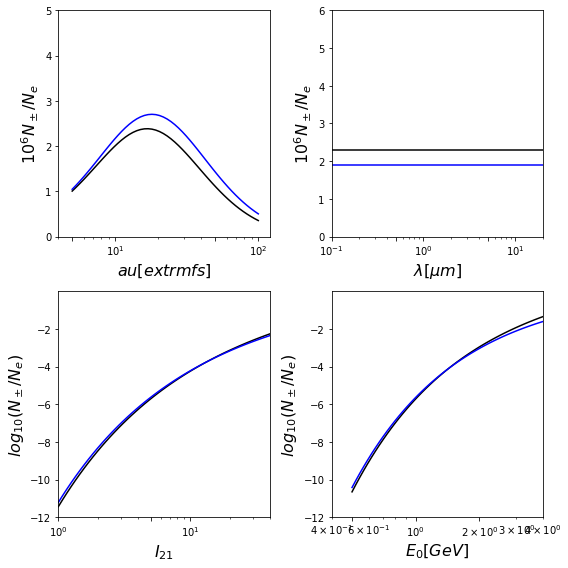

In [16]:
# plot all
fntsz = 16
fig, axes= plt.subplots(nrows=4, ncols=1,figsize=(8,8))

plt.subplot(2,2,1)
plt.semilogx(taulst,1e6*sadle_tau,'k-')
plt.semilogx(taulst,1e6*full_tau,'b-')
plt.xlim([4,120])
plt.ylim([0,5])
plt.xlabel('$\tau[\textrm{fs}]$',size=fntsz)
plt.ylabel('$10^6 N_\pm /N_e$',size=fntsz)
plt.xticks([5,10,50,100])
plt.yticks([0,1,2,3,4,5])

plt.subplot(2,2,2)
plt.semilogx(lbdlst,1e6*saddle_lbd,'b-')
plt.semilogx(lbdlst,1e6*full_lbd,'k-')
plt.xlim([0.1,20])
plt.ylim([0,5])
plt.xlabel('$\lambda[\mu m]$',size=fntsz)
plt.ylabel('$10^6 N_\pm /N_e$',size=fntsz)
plt.xticks([0.1,0.5,1,5,10])
plt.yticks([0,1,2,3,4,5,6])

plt.subplot(2,2,3)
plt.semilogx(I21lst,log10(saddle_I21),'k-')
plt.semilogx(I21lst,log10(full_I21),'b-')
plt.xlim([1,40])
plt.ylim([-12,0])
plt.xlabel('$I_{21}$',size=fntsz)
plt.ylabel('$log_{10}(N_\pm /N_e)$',size=fntsz)
plt.xticks([1,5,10])
plt.yticks([-12,-10,-8,-6,-4,-2])

plt.subplot(2,2,4)
plt.semilogx(E0lst,log10(saddle_E0),'k-')
plt.semilogx(E0lst,log10(full_E0),'b-')
plt.xlim([0.4,4])
plt.ylim([-12,0])
plt.xlabel('$E_{0}[GeV]$',size=fntsz)
plt.ylabel('$log_{10}(N_\pm /N_e)$',size=fntsz)
plt.xticks([0.5,1,2])
plt.yticks([-12,-10,-8,-6,-4,-2])

plt.tight_layout()
plt.show()